In [1]:
import pandas as pd
import re
import datetime
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('survey.csv', sep=',', encoding='latin-1')

In [3]:
df.head(2)

,startDate,endDate,Date,gps x,gps y,Surveyor,A.1 NIMEWO SERI A,A.2 Non anketè a.,A.3 MOUN Y'AP POZE KESYON YO.,A.4 Non chèf kay la.,...,G.2 Eske fatra ki mal jere ka bay maladi?,G.3 Kòman nou jere dlo ki pa bon yo?,G.4 Eske nou vle ankouraje paran nou pou pran desizyon ki ka pèmèt nou aplike tout règ ijèn yo ?,G.5 Eske paran nou deja pran kèk desizyon sou kesyon ijèn?,G.6 Ki desizyon paran nou konn pran deja sou kesyon ijèn ?,G.7 Obsèvasyon : veye konpòtman moun yo avan epi aprè entèvyou a.,G.8 Pran GPS kay oubyen kote wap kolekte done yo. latitude and longitude,G.8 Pran GPS kay oubyen kote wap kolekte done yo. altitude,G.8 Pran GPS kay oubyen kote wap kolekte done yo. accuracy,G.9 Dat ak lè ou fin ranpli kesyonè a.
0,startDate,endDate,Date,gps x,gps y,Surveyor,a1_nimewo_seri_a,non_anket_a,moun_yap_poze_kesyon_yo,non_chf_kay_la,...,eske_fatra_ki_mal_jere_ka_bay_maladi,kman_nou_jere_dlo_ki_pa_bon_yo,eske_nou_vle_ankouraje_paran_nou_pou_pra,eske_paran_nou_deja_pran_kk_desizyon_sou,ki_desizyon_paran_nou_konn_pran_deja_sou,obsvasyon,pran_gps_kay_oubyen_kote_wap_kolekte_don latit...,pran_gps_kay_oubyen_kote_wap_kolekte_don altitude,pran_gps_kay_oubyen_kote_wap_kolekte_don accuracy,dat_ou_fin_ranpli_kesyon_a
1,3/21/2018 9:09,3/22/2018 9:23,3/21/2018,NaN,NaN,Campteam2,1.00E+101,Valencia,1. Elèv,Guicio Pricien,...,0. Mwen dakò,1. Jete l tout kote,1. Wi,1. Wi,Pap jete fatra nan lari,ap panse,NaN,NaN,NaN,18:00.0


## Jean Marck

Hello, I will e

In [4]:
df = df.drop(df.columns[[0, 1, 3, 4, 5, 6, 7]], axis = 1)

In [5]:
df.head(2)

,Date,A.3 MOUN Y'AP POZE KESYON YO.,A.4 Non chèf kay la.,A.5 Non pwofesè a.,Non direktè a,A.6 Zòn kote moun nan rete a.,A.7 Nan ki lekòl ou ye?,A.8 DAT ENTEVYOU A AK LE LI KOUMANSE.,B.1 Non papa oubyen manman oubyen Gadyen an. 1,B.1 Non papa oubyen manman oubyen Gadyen an. 2,...,G.2 Eske fatra ki mal jere ka bay maladi?,G.3 Kòman nou jere dlo ki pa bon yo?,G.4 Eske nou vle ankouraje paran nou pou pran desizyon ki ka pèmèt nou aplike tout règ ijèn yo ?,G.5 Eske paran nou deja pran kèk desizyon sou kesyon ijèn?,G.6 Ki desizyon paran nou konn pran deja sou kesyon ijèn ?,G.7 Obsèvasyon : veye konpòtman moun yo avan epi aprè entèvyou a.,G.8 Pran GPS kay oubyen kote wap kolekte done yo. latitude and longitude,G.8 Pran GPS kay oubyen kote wap kolekte done yo. altitude,G.8 Pran GPS kay oubyen kote wap kolekte done yo. accuracy,G.9 Dat ak lè ou fin ranpli kesyonè a.
0,Date,moun_yap_poze_kesyon_yo,non_chf_kay_la,non_pwofes_a,directoname,zn_kote_moun_nan_rete_a_1,nan_ki_lekl_ou_ye,dat_entevyou_a_ak_le_li_koumanse,b1_non_papa_oubyen_manman_oubyen_gadyen__1,b1_non_papa_oubyen_manman_oubyen_gadyen__2,...,eske_fatra_ki_mal_jere_ka_bay_maladi,kman_nou_jere_dlo_ki_pa_bon_yo,eske_nou_vle_ankouraje_paran_nou_pou_pra,eske_paran_nou_deja_pran_kk_desizyon_sou,ki_desizyon_paran_nou_konn_pran_deja_sou,obsvasyon,pran_gps_kay_oubyen_kote_wap_kolekte_don latit...,pran_gps_kay_oubyen_kote_wap_kolekte_don altitude,pran_gps_kay_oubyen_kote_wap_kolekte_don accuracy,dat_ou_fin_ranpli_kesyon_a
1,3/21/2018,1. Elèv,Guicio Pricien,NaN,NaN,Corail,5. Institution Mixte Espoir,00:00.0,Guicio Pricien,NaN,...,0. Mwen dakò,1. Jete l tout kote,1. Wi,1. Wi,Pap jete fatra nan lari,ap panse,NaN,NaN,NaN,18:00.0


In [5]:
df = df.drop([0])

In [9]:
#df.head(2)

In [10]:
#df.info()

In [1]:
#df.columns

In [6]:
df[['B.2 Sèks 1']].isnull().any()

B.2 Sèks 1    False
dtype: bool

In [7]:
s = df[['B.2 Sèks 1']].dropna()['B.2 Sèks 1'].apply(lambda x: str(x).split('. '))

In [8]:
sex = []
for i in s:
    sex.append(i[1])

In [9]:
df['sex'] = sex

In [11]:
#df.sex

In [10]:
import numpy as np
cols = df.columns

In [11]:
cols = np.array(cols)

In [12]:
i = 0
for c in cols:
    if i < 5:
        print(c)
        i += 1

Date
A.3 MOUN Y'AP POZE KESYON YO.
A.4 Non chèf kay la.
A.5 Non pwofesè a.
Non direktè a


In [13]:
matches = []
for c in cols:
        matches.append(re.findall(r'[\w\.\d]+', c))

In [25]:
#matches

In [14]:
matches1 = []
for m in matches:
    if re.search(r'\d', m[0]):
        del m[0]
        matches1.append(m)
    else:
        matches1.append(m)
        

In [28]:
#matches1

In [15]:
cols1 = []
for m1 in matches1:
    cols1.append(' '.join(m1))

In [2]:
#cols1

In [3]:
#df.head()

In [16]:
df.columns = cols1

In [4]:
#df.head()

In [17]:
sex_homme = []
sex_list = list(df['sex'])
for g in sex_list:
    if g == 'Gason':
        sex_homme.append(1)
    else:
        sex_homme.append(0)

In [19]:
sex_homme[:9]

[0, 1, 0, 0, 0, 0, 0, 0, 0]

In [18]:
sex_femme= []
sex_list = list(df['sex'])
for f in sex_list:
    if f == 'Fi':
        sex_femme.append(1)
    else:
        sex_femme.append(0)

In [19]:
sex_femme[:9]

[1, 0, 1, 1, 1, 1, 1, 1, 1]

In [22]:
sum(sex_femme) + sum(sex_homme)

778

In [23]:
sex_femme = np.array(sex_femme)
sex_homme = np.array(sex_homme)

In [24]:
df['sex/male'] = sex_homme
df['sex/female'] = sex_femme

In [25]:
df.head()

,Date,MOUN Y AP POZE KESYON YO.,Non chèf kay la.,Non pwofesè a.,Non direktè a,Zòn kote moun nan rete a.,Nan ki lekòl ou ye,DAT ENTEVYOU A AK LE LI KOUMANSE.,Non papa oubyen manman oubyen Gadyen an. 1,Non papa oubyen manman oubyen Gadyen an. 2,...,Eske paran nou deja pran kèk desizyon sou kesyon ijèn,Ki desizyon paran nou konn pran deja sou kesyon ijèn,Obsèvasyon veye konpòtman moun yo avan epi aprè entèvyou a.,Pran GPS kay oubyen kote wap kolekte done yo. latitude and longitude,Pran GPS kay oubyen kote wap kolekte done yo. altitude,Pran GPS kay oubyen kote wap kolekte done yo. accuracy,Dat ak lè ou fin ranpli kesyonè a.,sex,sex/male,sex/female
1,3/21/2018,1. Elèv,Guicio Pricien,NaN,NaN,Corail,5. Institution Mixte Espoir,00:00.0,Guicio Pricien,NaN,...,1. Wi,Pap jete fatra nan lari,ap panse,NaN,NaN,NaN,18:00.0,Fi,0,1
2,3/21/2018,1. Elèv,Pierre AUBRY,NaN,NaN,Delmas 65,5. Institution Mixte Espoir,01:00.0,Pierre Aubry ak Tamara Loiseau Aubry,NaN,...,1. Wi,Pa kite dechè,NaN,NaN,NaN,NaN,23:00.0,Gason,1,0
3,3/21/2018,1. Elèv,Cherestal simone,NaN,NaN,Delmas 32 rue victoire,5. Institution Mixte Espoir,59:00.0,Cherestal simone,NaN,...,1. Wi,"Lave men avanl mange, lè li sot nan toilette, ...",NaN,NaN,NaN,NaN,10:00.0,Fi,0,1
4,3/21/2018,1. Elèv,Auis Carousse,NaN,NaN,"Delmas 32,Rue Jean Baptiste",5. Institution Mixte Espoir,58:00.0,Sophia Gabriel,NaN,...,1. Wi,NaN,NaN,NaN,NaN,NaN,09:00.0,Fi,0,1
5,3/21/2018,1. Elèv,Pierre Renette,NaN,NaN,"Delmas32, Rue Petion#7",5. Institution Mixte Espoir,01:00.0,Pierre Renette,NaN,...,1. Wi,"Li toujou fe afel pwop, epi avant li al fe man...",NaN,NaN,NaN,NaN,13:00.0,Fi,0,1


In [26]:
#df['Relasyon ak moun kap dirije kay la/Papa']
relation_ship_with_chief_hh_papa = []
for rel in np.array(df['Relasyon ak moun kap dirije kay la 1']):
    if 'Papa' in str(rel):
        relation_ship_with_chief_hh_papa.append(1)
    else:
        relation_ship_with_chief_hh_papa.append(0)
df['Relasyon ak moun kap dirije kay la/Papa'] = relation_ship_with_chief_hh_papa

In [27]:
relation_ship_with_chief_hh_papa[:9]

[1, 1, 0, 1, 0, 1, 0, 0, 0]

In [28]:
relation_ship_with_chief_hh_manman = []
for rel in np.array(df['Relasyon ak moun kap dirije kay la 1']):
    if 'Manman' in str(rel):
        relation_ship_with_chief_hh_manman.append(1)
    else:
        relation_ship_with_chief_hh_manman.append(0)
df['Relasyon ak moun kap dirije kay la/Manman'] = relation_ship_with_chief_hh_manman

In [29]:
relation_ship_with_chief_hh_manman[0:9]

[0, 0, 1, 0, 1, 0, 0, 0, 0]

In [30]:
relation_ship_with_chief_hh_se = []
for rel in np.array(df['Relasyon ak moun kap dirije kay la 1']):
    if 'Sè' in str(rel):
        relation_ship_with_chief_hh_se.append(1)
    else:
        relation_ship_with_chief_hh_se.append(0)
df['Relasyon ak moun kap dirije kay la/Sè'] = relation_ship_with_chief_hh_se

In [31]:
len(relation_ship_with_chief_hh_se)

778

In [32]:
sum(relation_ship_with_chief_hh_se)

27

In [33]:
relation_ship_with_chief_hh_se[:20]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [34]:
relation_ship_with_chief_hh_mari_ou_madanm = []
for rel in np.array(df['Relasyon ak moun kap dirije kay la 1']):
    if 'Mari oswa Madanm' in str(rel):
        relation_ship_with_chief_hh_mari_ou_madanm.append(1)
    else:
        relation_ship_with_chief_hh_mari_ou_madanm.append(0)
df['Relasyon ak moun kap dirije kay la/Mari oswa Madanm'] = relation_ship_with_chief_hh_mari_ou_madanm

In [35]:
sum(relation_ship_with_chief_hh_mari_ou_madanm)

2

In [36]:
relation_ship_with_chief_hh_pitit_gason_ou_fi = []
for rel in np.array(df['Relasyon ak moun kap dirije kay la 1']):
    if 'Pitit gason oswa Pitit fi' in str(rel):
        relation_ship_with_chief_hh_pitit_gason_ou_fi.append(1)
    else:
        relation_ship_with_chief_hh_pitit_gason_ou_fi.append(0)
df['Relasyon ak moun kap dirije kay la/Pitit gason oswa Pitit fi'] = relation_ship_with_chief_hh_pitit_gason_ou_fi

In [37]:
sum(relation_ship_with_chief_hh_pitit_gason_ou_fi)

42

In [38]:
relation_ship_with_chief_hh_kouzen_ou_kouzin = []
for rel in np.array(df['Relasyon ak moun kap dirije kay la 1']):
    if 'Kouzen / Kouzin' in str(rel):
        relation_ship_with_chief_hh_kouzen_ou_kouzin.append(1)
    else:
        relation_ship_with_chief_hh_kouzen_ou_kouzin.append(0)
df['Relasyon ak moun kap dirije kay la/Kouzen / Kouzin'] = relation_ship_with_chief_hh_kouzen_ou_kouzin

In [39]:
sum(relation_ship_with_chief_hh_kouzen_ou_kouzin)

7

In [40]:
relation_ship_with_chief_hh_gadyen = []
for rel in np.array(df['Relasyon ak moun kap dirije kay la 1']):
    if 'Gadyen' in str(rel):
        relation_ship_with_chief_hh_gadyen.append(1)
    else:
        relation_ship_with_chief_hh_gadyen.append(0)
df['Relasyon ak moun kap dirije kay la/Gadyen'] = relation_ship_with_chief_hh_gadyen

In [41]:
sum(relation_ship_with_chief_hh_gadyen)

34

In [42]:
relation_ship_with_chief_hh_lot = []
for rel in np.array(df['Relasyon ak moun kap dirije kay la 1']):
    if 'Lòt' in str(rel):
        relation_ship_with_chief_hh_lot.append(1)
    else:
        relation_ship_with_chief_hh_lot.append(0)
df['Relasyon ak moun kap dirije kay la/Lòt'] = relation_ship_with_chief_hh_lot

In [43]:
sum(relation_ship_with_chief_hh_lot)

58

In [44]:
df.head()

,Date,MOUN Y AP POZE KESYON YO.,Non chèf kay la.,Non pwofesè a.,Non direktè a,Zòn kote moun nan rete a.,Nan ki lekòl ou ye,DAT ENTEVYOU A AK LE LI KOUMANSE.,Non papa oubyen manman oubyen Gadyen an. 1,Non papa oubyen manman oubyen Gadyen an. 2,...,sex/male,sex/female,Relasyon ak moun kap dirije kay la/Papa,Relasyon ak moun kap dirije kay la/Manman,Relasyon ak moun kap dirije kay la/Sè,Relasyon ak moun kap dirije kay la/Mari oswa Madanm,Relasyon ak moun kap dirije kay la/Pitit gason oswa Pitit fi,Relasyon ak moun kap dirije kay la/Kouzen / Kouzin,Relasyon ak moun kap dirije kay la/Gadyen,Relasyon ak moun kap dirije kay la/Lòt
1,3/21/2018,1. Elèv,Guicio Pricien,NaN,NaN,Corail,5. Institution Mixte Espoir,00:00.0,Guicio Pricien,NaN,...,0,1,1,0,0,0,0,0,0,0
2,3/21/2018,1. Elèv,Pierre AUBRY,NaN,NaN,Delmas 65,5. Institution Mixte Espoir,01:00.0,Pierre Aubry ak Tamara Loiseau Aubry,NaN,...,1,0,1,0,0,0,0,0,0,0
3,3/21/2018,1. Elèv,Cherestal simone,NaN,NaN,Delmas 32 rue victoire,5. Institution Mixte Espoir,59:00.0,Cherestal simone,NaN,...,0,1,0,1,0,0,0,0,0,0
4,3/21/2018,1. Elèv,Auis Carousse,NaN,NaN,"Delmas 32,Rue Jean Baptiste",5. Institution Mixte Espoir,58:00.0,Sophia Gabriel,NaN,...,0,1,1,0,0,0,0,0,0,0
5,3/21/2018,1. Elèv,Pierre Renette,NaN,NaN,"Delmas32, Rue Petion#7",5. Institution Mixte Espoir,01:00.0,Pierre Renette,NaN,...,0,1,0,1,0,0,0,0,0,0


In [98]:
#df = df.drop('Relasyon ak moun kap dirije kay la/Kouzen / Lòt', axis=1)

In [46]:
df.head()

,Date,MOUN Y AP POZE KESYON YO.,Non chèf kay la.,Non pwofesè a.,Non direktè a,Zòn kote moun nan rete a.,Nan ki lekòl ou ye,DAT ENTEVYOU A AK LE LI KOUMANSE.,Non papa oubyen manman oubyen Gadyen an. 1,Non papa oubyen manman oubyen Gadyen an. 2,...,sex/male,sex/female,Relasyon ak moun kap dirije kay la/Papa,Relasyon ak moun kap dirije kay la/Manman,Relasyon ak moun kap dirije kay la/Sè,Relasyon ak moun kap dirije kay la/Mari oswa Madanm,Relasyon ak moun kap dirije kay la/Pitit gason oswa Pitit fi,Relasyon ak moun kap dirije kay la/Kouzen / Kouzin,Relasyon ak moun kap dirije kay la/Gadyen,Relasyon ak moun kap dirije kay la/Lòt
1,3/21/2018,1. Elèv,Guicio Pricien,NaN,NaN,Corail,5. Institution Mixte Espoir,00:00.0,Guicio Pricien,NaN,...,0,1,1,0,0,0,0,0,0,0
2,3/21/2018,1. Elèv,Pierre AUBRY,NaN,NaN,Delmas 65,5. Institution Mixte Espoir,01:00.0,Pierre Aubry ak Tamara Loiseau Aubry,NaN,...,1,0,1,0,0,0,0,0,0,0
3,3/21/2018,1. Elèv,Cherestal simone,NaN,NaN,Delmas 32 rue victoire,5. Institution Mixte Espoir,59:00.0,Cherestal simone,NaN,...,0,1,0,1,0,0,0,0,0,0
4,3/21/2018,1. Elèv,Auis Carousse,NaN,NaN,"Delmas 32,Rue Jean Baptiste",5. Institution Mixte Espoir,58:00.0,Sophia Gabriel,NaN,...,0,1,1,0,0,0,0,0,0,0
5,3/21/2018,1. Elèv,Pierre Renette,NaN,NaN,"Delmas32, Rue Petion#7",5. Institution Mixte Espoir,01:00.0,Pierre Renette,NaN,...,0,1,0,1,0,0,0,0,0,0


In [47]:
nivo_edikasyon_pat_janm_al_lekol = [] #pat janm al lekòl
nivo_edikasyon_konn_li_ak_ekri = [] #konn li ak ekri
nivo_edikasyon_klas_preskole = [] #Klas preskolè
nivo_edikasyon_lekol_prime = [] #lekòl primè
nivo_edikasyon_lekol_segonde = [] #lekòl segondè
nivo_edikasyon_fomasyon_teknik = [] #fòmasyon teknik
nivo_edikasyon_inivesite = [] #inivèsitè

for niv in np.array(df['Nivo edikasyon 1']):
    if 'pat janm al lekòl' in str(niv):
        nivo_edikasyon_pat_janm_al_lekol.append(1)
    else:
        nivo_edikasyon_pat_janm_al_lekol.append(0)
        
df['Nivo edikasyon 1/pat janm al lekòl'] = nivo_edikasyon_pat_janm_al_lekol

for niv in np.array(df['Nivo edikasyon 1']):
    if 'konn li ak ekri' in str(niv):
        nivo_edikasyon_konn_li_ak_ekri.append(1)
    else:
        nivo_edikasyon_konn_li_ak_ekri.append(0)
        
df['Nivo edikasyon 1/konn li ak ekri'] = nivo_edikasyon_konn_li_ak_ekri

for niv in np.array(df['Nivo edikasyon 1']):
    if 'Klas preskolè' in str(niv):
        nivo_edikasyon_klas_preskole.append(1)
    else:
        nivo_edikasyon_klas_preskole.append(0)
        
df['Nivo edikasyon 1/Klas preskolè'] = nivo_edikasyon_klas_preskole

for niv in np.array(df['Nivo edikasyon 1']):
    if 'lekòl primè' in str(niv):
        nivo_edikasyon_lekol_prime.append(1)
    else:
        nivo_edikasyon_lekol_prime.append(0)
        
df['Nivo edikasyon 1/lekòl primè'] = nivo_edikasyon_lekol_prime

for niv in np.array(df['Nivo edikasyon 1']):
    if 'lekòl segondè' in str(niv):
        nivo_edikasyon_lekol_segonde.append(1)
    else:
        nivo_edikasyon_lekol_segonde.append(0)
        
df['Nivo edikasyon 1/lekòl segondè'] = nivo_edikasyon_lekol_segonde

for niv in np.array(df['Nivo edikasyon 1']):
    if 'fòmasyon teknik' in str(niv):
        nivo_edikasyon_fomasyon_teknik.append(1)
    else:
        nivo_edikasyon_fomasyon_teknik.append(0)
        
df['Nivo edikasyon 1/fòmasyon teknik'] = nivo_edikasyon_fomasyon_teknik

for niv in np.array(df['Nivo edikasyon 1']):
    if 'inivèsitè' in str(niv):
        nivo_edikasyon_inivesite.append(1)
    else:
        nivo_edikasyon_inivesite.append(0)
        
df['Nivo edikasyon 1/inivèsitè'] = nivo_edikasyon_inivesite

In [48]:
df.head()

,Date,MOUN Y AP POZE KESYON YO.,Non chèf kay la.,Non pwofesè a.,Non direktè a,Zòn kote moun nan rete a.,Nan ki lekòl ou ye,DAT ENTEVYOU A AK LE LI KOUMANSE.,Non papa oubyen manman oubyen Gadyen an. 1,Non papa oubyen manman oubyen Gadyen an. 2,...,Relasyon ak moun kap dirije kay la/Kouzen / Kouzin,Relasyon ak moun kap dirije kay la/Gadyen,Relasyon ak moun kap dirije kay la/Lòt,Nivo edikasyon 1/pat janm al lekòl,Nivo edikasyon 1/konn li ak ekri,Nivo edikasyon 1/Klas preskolè,Nivo edikasyon 1/lekòl primè,Nivo edikasyon 1/lekòl segondè,Nivo edikasyon 1/fòmasyon teknik,Nivo edikasyon 1/inivèsitè
1,3/21/2018,1. Elèv,Guicio Pricien,NaN,NaN,Corail,5. Institution Mixte Espoir,00:00.0,Guicio Pricien,NaN,...,0,0,0,0,0,0,1,0,0,0
2,3/21/2018,1. Elèv,Pierre AUBRY,NaN,NaN,Delmas 65,5. Institution Mixte Espoir,01:00.0,Pierre Aubry ak Tamara Loiseau Aubry,NaN,...,0,0,0,0,0,0,0,0,0,1
3,3/21/2018,1. Elèv,Cherestal simone,NaN,NaN,Delmas 32 rue victoire,5. Institution Mixte Espoir,59:00.0,Cherestal simone,NaN,...,0,0,0,0,0,0,0,1,0,0
4,3/21/2018,1. Elèv,Auis Carousse,NaN,NaN,"Delmas 32,Rue Jean Baptiste",5. Institution Mixte Espoir,58:00.0,Sophia Gabriel,NaN,...,0,0,0,0,0,0,1,0,0,0
5,3/21/2018,1. Elèv,Pierre Renette,NaN,NaN,"Delmas32, Rue Petion#7",5. Institution Mixte Espoir,01:00.0,Pierre Renette,NaN,...,0,0,0,0,0,0,0,1,0,0


In [49]:
sa_moun_lan_ap_fe_poul_ka_pran_swen_tet_li_pap_travay = [] #pap travay
sa_moun_lan_ap_fe_poul_ka_pran_swen_tet_li_elev = [] #elèv
sa_moun_lan_ap_fe_poul_ka_pran_swen_tet_li_ap_trvay = [] #ap trvay
sa_moun_lan_ap_fe_poul_ka_pran_swen_tet_li_ap_fe_komes = [] #ap fè komès
sa_moun_lan_ap_fe_poul_ka_pran_swen_tet_li_lot = [] #lòt

for niv in np.array(df['Sa moun lan ap fè poul ka pran swen tèt li 1']):
    if 'pap travay' in str(niv):
        sa_moun_lan_ap_fe_poul_ka_pran_swen_tet_li_pap_travay.append(1)
    else:
        sa_moun_lan_ap_fe_poul_ka_pran_swen_tet_li_pap_travay.append(0)
        
df['Sa moun lan ap fè poul ka pran swen tèt li 1/pap travay'] = sa_moun_lan_ap_fe_poul_ka_pran_swen_tet_li_pap_travay

for niv in np.array(df['Sa moun lan ap fè poul ka pran swen tèt li 1']):
    if 'elèv' in str(niv):
        sa_moun_lan_ap_fe_poul_ka_pran_swen_tet_li_elev.append(1)
    else:
        sa_moun_lan_ap_fe_poul_ka_pran_swen_tet_li_elev.append(0)
        
df['Sa moun lan ap fè poul ka pran swen tèt li 1/elèv'] = sa_moun_lan_ap_fe_poul_ka_pran_swen_tet_li_elev

for niv in np.array(df['Sa moun lan ap fè poul ka pran swen tèt li 1']):
    if 'ap trvay' in str(niv):
        sa_moun_lan_ap_fe_poul_ka_pran_swen_tet_li_ap_trvay.append(1)
    else:
        sa_moun_lan_ap_fe_poul_ka_pran_swen_tet_li_ap_trvay.append(0)
        
df['Sa moun lan ap fè poul ka pran swen tèt li 1/ap trvay'] = sa_moun_lan_ap_fe_poul_ka_pran_swen_tet_li_ap_trvay

for niv in np.array(df['Sa moun lan ap fè poul ka pran swen tèt li 1']):
    if 'ap fè komès' in str(niv):
        sa_moun_lan_ap_fe_poul_ka_pran_swen_tet_li_ap_fe_komes.append(1)
    else:
        sa_moun_lan_ap_fe_poul_ka_pran_swen_tet_li_ap_fe_komes.append(0)
        
df['Sa moun lan ap fè poul ka pran swen tèt li 1/ap fè komès'] = sa_moun_lan_ap_fe_poul_ka_pran_swen_tet_li_ap_fe_komes

for niv in np.array(df['Sa moun lan ap fè poul ka pran swen tèt li 1']):
    if 'lòt' in str(niv):
        sa_moun_lan_ap_fe_poul_ka_pran_swen_tet_li_lot.append(1)
    else:
        sa_moun_lan_ap_fe_poul_ka_pran_swen_tet_li_lot.append(0)
        
df['Sa moun lan ap fè poul ka pran swen tèt li 1/lòt'] = sa_moun_lan_ap_fe_poul_ka_pran_swen_tet_li_lot

In [50]:
df.head()

,Date,MOUN Y AP POZE KESYON YO.,Non chèf kay la.,Non pwofesè a.,Non direktè a,Zòn kote moun nan rete a.,Nan ki lekòl ou ye,DAT ENTEVYOU A AK LE LI KOUMANSE.,Non papa oubyen manman oubyen Gadyen an. 1,Non papa oubyen manman oubyen Gadyen an. 2,...,Nivo edikasyon 1/Klas preskolè,Nivo edikasyon 1/lekòl primè,Nivo edikasyon 1/lekòl segondè,Nivo edikasyon 1/fòmasyon teknik,Nivo edikasyon 1/inivèsitè,Sa moun lan ap fè poul ka pran swen tèt li 1/pap travay,Sa moun lan ap fè poul ka pran swen tèt li 1/elèv,Sa moun lan ap fè poul ka pran swen tèt li 1/ap trvay,Sa moun lan ap fè poul ka pran swen tèt li 1/ap fè komès,Sa moun lan ap fè poul ka pran swen tèt li 1/lòt
1,3/21/2018,1. Elèv,Guicio Pricien,NaN,NaN,Corail,5. Institution Mixte Espoir,00:00.0,Guicio Pricien,NaN,...,0,1,0,0,0,0,0,1,0,0
2,3/21/2018,1. Elèv,Pierre AUBRY,NaN,NaN,Delmas 65,5. Institution Mixte Espoir,01:00.0,Pierre Aubry ak Tamara Loiseau Aubry,NaN,...,0,0,0,0,1,0,0,1,0,0
3,3/21/2018,1. Elèv,Cherestal simone,NaN,NaN,Delmas 32 rue victoire,5. Institution Mixte Espoir,59:00.0,Cherestal simone,NaN,...,0,0,1,0,0,0,0,1,0,0
4,3/21/2018,1. Elèv,Auis Carousse,NaN,NaN,"Delmas 32,Rue Jean Baptiste",5. Institution Mixte Espoir,58:00.0,Sophia Gabriel,NaN,...,0,1,0,0,0,0,0,1,0,0
5,3/21/2018,1. Elèv,Pierre Renette,NaN,NaN,"Delmas32, Rue Petion#7",5. Institution Mixte Espoir,01:00.0,Pierre Renette,NaN,...,0,0,1,0,0,1,0,0,0,0


In [51]:
eta_sivil_moun_nan_selibate = [] #selibatè
eta_sivil_moun_nan_marye = [] #marye
eta_sivil_moun_nan_plase = [] #Plase
eta_sivil_moun_nan_divose = [] #Divòse
eta_sivil_moun_nan_vef = [] #Vèf

for niv in np.array(df['Eta Sivil moun nan. 1']):
    if 'selibatè' in str(niv):
        eta_sivil_moun_nan_selibate.append(1)
    else:
        eta_sivil_moun_nan_selibate.append(0)
        
df['Eta Sivil moun nan. 1/selibatè'] = eta_sivil_moun_nan_selibate

for niv in np.array(df['Eta Sivil moun nan. 1']):
    if 'marye' in str(niv):
        eta_sivil_moun_nan_marye.append(1)
    else:
        eta_sivil_moun_nan_marye.append(0)
        
df['Eta Sivil moun nan. 1/marye'] = eta_sivil_moun_nan_marye

for niv in np.array(df['Eta Sivil moun nan. 1']):
    if 'Plase' in str(niv):
        eta_sivil_moun_nan_plase.append(1)
    else:
        eta_sivil_moun_nan_plase.append(0)
        
df['Eta Sivil moun nan. 1/Plase'] = eta_sivil_moun_nan_plase

for niv in np.array(df['Eta Sivil moun nan. 1']):
    if 'Divòse' in str(niv):
        eta_sivil_moun_nan_divose.append(1)
    else:
        eta_sivil_moun_nan_divose.append(0)
        
df['Eta Sivil moun nan. 1/Divòse'] = eta_sivil_moun_nan_divose

for niv in np.array(df['Eta Sivil moun nan. 1']):
    if 'Vèf' in str(niv):
        eta_sivil_moun_nan_vef.append(1)
    else:
        eta_sivil_moun_nan_vef.append(0)
        
df['Eta Sivil moun nan. 1/Vèf'] = eta_sivil_moun_nan_vef

In [52]:
df.head()

,Date,MOUN Y AP POZE KESYON YO.,Non chèf kay la.,Non pwofesè a.,Non direktè a,Zòn kote moun nan rete a.,Nan ki lekòl ou ye,DAT ENTEVYOU A AK LE LI KOUMANSE.,Non papa oubyen manman oubyen Gadyen an. 1,Non papa oubyen manman oubyen Gadyen an. 2,...,Sa moun lan ap fè poul ka pran swen tèt li 1/pap travay,Sa moun lan ap fè poul ka pran swen tèt li 1/elèv,Sa moun lan ap fè poul ka pran swen tèt li 1/ap trvay,Sa moun lan ap fè poul ka pran swen tèt li 1/ap fè komès,Sa moun lan ap fè poul ka pran swen tèt li 1/lòt,Eta Sivil moun nan. 1/selibatè,Eta Sivil moun nan. 1/marye,Eta Sivil moun nan. 1/Plase,Eta Sivil moun nan. 1/Divòse,Eta Sivil moun nan. 1/Vèf
1,3/21/2018,1. Elèv,Guicio Pricien,NaN,NaN,Corail,5. Institution Mixte Espoir,00:00.0,Guicio Pricien,NaN,...,0,0,1,0,0,0,0,0,0,0
2,3/21/2018,1. Elèv,Pierre AUBRY,NaN,NaN,Delmas 65,5. Institution Mixte Espoir,01:00.0,Pierre Aubry ak Tamara Loiseau Aubry,NaN,...,0,0,1,0,0,0,0,0,0,0
3,3/21/2018,1. Elèv,Cherestal simone,NaN,NaN,Delmas 32 rue victoire,5. Institution Mixte Espoir,59:00.0,Cherestal simone,NaN,...,0,0,1,0,0,0,0,0,0,0
4,3/21/2018,1. Elèv,Auis Carousse,NaN,NaN,"Delmas 32,Rue Jean Baptiste",5. Institution Mixte Espoir,58:00.0,Sophia Gabriel,NaN,...,0,0,1,0,0,0,0,0,0,0
5,3/21/2018,1. Elèv,Pierre Renette,NaN,NaN,"Delmas32, Rue Petion#7",5. Institution Mixte Espoir,01:00.0,Pierre Renette,NaN,...,1,0,0,0,0,0,0,0,0,0


In [22]:
def count_freq_simple_answer(dframe, col_name):
    response_frequencies = {}
    col = dframe[col_name]
    for entry in col:
        if entry in response_frequencies.keys():
            response_frequencies[entry] = response_frequencies[entry] + 1
        else:
            response_frequencies[entry] = 1
    col_name_df = pd.DataFrame(list(response_frequencies.items()), columns =['response', 'frequency'])
    print(col_name_df)
    return col_name_df            

In [60]:
r = count_freq_simple_answer(df, 'sex')

  response  frequency
0       Fi        462
1    Gason        316


In [61]:
r

,response,frequency
0,Fi,462
1,Gason,316


In [131]:
def plot_g(sub):
    x = list(sub['response'])
    y = list(sub['frequency'])
    ind = np.arange(len(y))
    plt.bar(ind, y)
    plt.xticks(ind, x, rotation=60)
    plt.show()

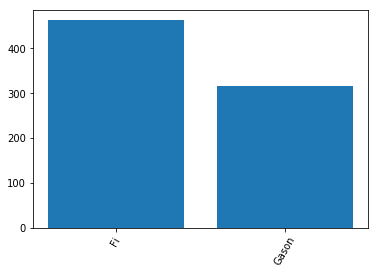

In [132]:
plot_g(r)

In [56]:
r['Fi']

462

In [57]:
r['Gason']

316

In [58]:
int(r['Fi']) + int(r['Gason'])

778

In [21]:
def count_freq_multiple_answer(dframe, col_name, patterns):
    response_frequencies = {}
    col = dframe[col_name]
    print(len(list(col)))
    for entry in col:
        for pattern in patterns:
            if pattern in str(entry):
                if pattern in response_frequencies.keys():
                    response_frequencies[pattern] = response_frequencies[pattern] + 1
                else:
                    response_frequencies[pattern] = 1       
    col_name_df = pd.DataFrame(list(response_frequencies.items()), columns =['response', 'frequency'])
    print(col_name_df)
    return col_name_df

In [74]:
r1 = count_freq_multiple_answer(df, 'Nan 6 mwa ki pase yo èske gen moun nan kay la ki soufri maladi sa yo 1',  ['Dyare', 'Tifoyid', 'Pwoblèm po', 'Pwoblèm paka respire', 'Lavyèf toutan', 'Vè', 'Doulè nan vant', 'Okenn nan maladi sa yo'])

778
                 response  frequency
0                   Dyare         25
1          Doulè nan vant         32
2              Pwoblèm po         17
3  Okenn nan maladi sa yo        283
4           Lavyèf toutan         19
5                 Tifoyid          7
6                      Vè          6
7    Pwoblèm paka respire          8


In [72]:
np.array(r1['frequency']).sum()

397

In [75]:
r1

,response,frequency
0,Dyare,25
1,Doulè nan vant,32
2,Pwoblèm po,17
3,Okenn nan maladi sa yo,283
4,Lavyèf toutan,19
5,Tifoyid,7
6,Vè,6
7,Pwoblèm paka respire,8


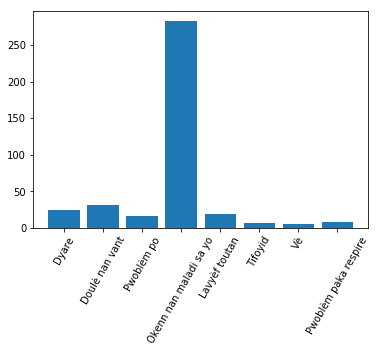

In [133]:
plot_g(r1)

# Enfòmasyon sou dlo

In [78]:
r2 = count_freq_multiple_answer(df, 'Ki kote dlo pou moun bwè san pwoblèm san danje san nou pa pè ka soti',  ['Dlo nan boutèy/ Sachè / Galon', 'Dlo nan tiyo nan kay la', 'Dlo kamyon', 'Tiyo piblik', 'Dlo pui ki pwoteje/ki gen kouvèti', 'Dlo nan sitèn ki pwoteje/ki kouvri', 'Dlo lapli yo ranmase', 'Dlo pwi ki pa pwoteje/ki pa gen kouvri', 'Dlo nan sitèn ki pa pwoteje/ki pa kouvri', 'Machann kap vann dlo (nan bokit)'])

778
                                 response  frequency
0       Dlo pui ki pwoteje/ki gen kouvèti        322
1           Dlo nan boutèy/ Sachè / Galon        769
2      Dlo nan sitèn ki pwoteje/ki kouvri        314
3                              Dlo kamyon        373
4                    Dlo lapli yo ranmase         27
5        Machann kap vann dlo (nan bokit)          9
6                             Tiyo piblik        199
7                 Dlo nan tiyo nan kay la        308
8  Dlo pwi ki pa pwoteje/ki pa gen kouvri          1


In [79]:
"""0. Dlo nan boutèy/ Sachè / Galon
1. Dlo nan tiyo nan kay la.
2. Dlo kamyon
3. Tiyo piblik
4. Dlo pui ki pwoteje/ki gen kouvèti
5. Dlo nan sitèn ki pwoteje/ki kouvri
6. Dlo lapli yo ranmase
7. Dlo pwi ki pa pwoteje/ki pa gen kouvri
8. Dlo nan sitèn ki pa pwoteje/ki pa kouvri
9. Machann kap vann dlo (nan bokit).
"""
r2

,response,frequency
0,Dlo pui ki pwoteje/ki gen kouvèti,322
1,Dlo nan boutèy/ Sachè / Galon,769
2,Dlo nan sitèn ki pwoteje/ki kouvri,314
3,Dlo kamyon,373
4,Dlo lapli yo ranmase,27
5,Machann kap vann dlo (nan bokit),9
6,Tiyo piblik,199
7,Dlo nan tiyo nan kay la,308
8,Dlo pwi ki pa pwoteje/ki pa gen kouvri,1


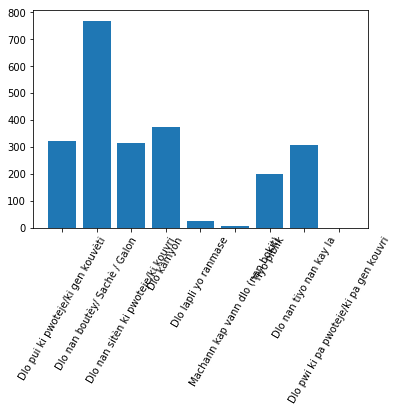

In [134]:
plot_g(r2)

In [80]:
r3 = count_freq_multiple_answer(df, 'Ki dlo ou toujou bwè', \
                                ['Dlo trete nan boutèy/ Sachè/Galon', 'Dlo nan tiyo nan kay la',\
                                 'Dlo kamyon', 'Tiyo piblik', 'Dlo pwi ki pwoteje/ki gen kouvèti',\
                                 'Dlo nan sitèn ki pwoteje/ki kouvri', 'Dlo lapli yo ranmase',\
                                 'Dlo pwi ki pa pwoteje/ ki pa gen kouvèti',\
                                 'Dlo nan sitèn ki pa pwoteje/ki pa kouvri',\
                                 'Dlo sitèn ki pa pwoteje/ki pa gen kouvèti'])

778
                             response  frequency
0  Dlo nan sitèn ki pwoteje/ki kouvri         10
1   Dlo trete nan boutèy/ Sachè/Galon        753
2             Dlo nan tiyo nan kay la          3
3                         Tiyo piblik         10
4                          Dlo kamyon          2


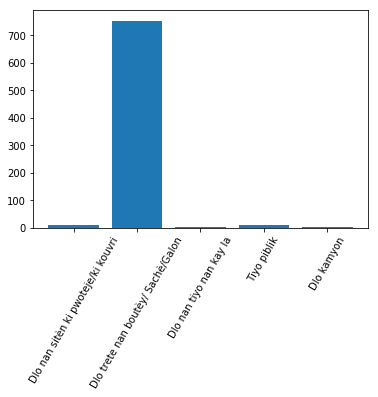

In [135]:
plot_g(r3)

In [81]:
r4 = count_freq_simple_answer(df, 'Ki dlo ou ankouraje paran yo ak elèv yo bwè')

                                response  frequency
0                                    NaN        742
1   0. Dlo trete nan boutèy/ Sachè/Galon         33
2   4. Dlo pwi ki pwoteje/ki gen kouvèti          2
3  5. Dlo nan sitèn ki pwoteje/ki kouvri          1


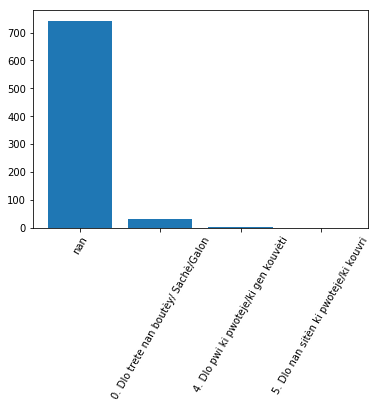

In [136]:
plot_g(r4)

In [82]:
r5 = count_freq_simple_answer(df, 'Ki dlo ou ankouraje pitit ou bwè')

                               response  frequency
0                                   NaN        412
1  0. Dlo trete nan boutèy/ Sachè/Galon        365
2                         2. Dlo kamyon          1


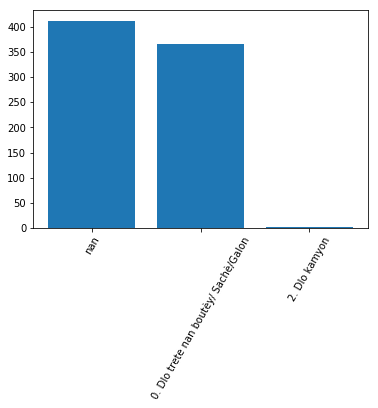

In [137]:
plot_g(r5)

In [83]:
#Ak ki dlo ou lave men w
r6 = count_freq_simple_answer(df, 'Ak ki dlo ou lave men w')

                                            response  frequency
0                                                NaN        370
1                            1. Dlo klore oswa filre        299
2  0. Dlo pwòp (dlo lapli,dlo kamyon,dlo tiyo,dlo...        107
3                                  2. Dlo ki pa pwòp          2


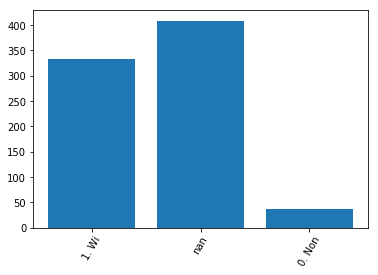

In [138]:
plot_g(r6)

In [84]:
"""
0. Veso ou paka wè sak ladanl byen
1. Veso ou ka wè byen fasil tout sak anndanl
2. Veso ki fèt an fè
3. Veso ki fèt ak ajil
"""
r7 = count_freq_multiple_answer(df, 'Ki veso ki pi bon pou nou mete dlo pou moun bwè', \
                                ['Veso ou paka wè sak ladanl byen',\
                                 'Veso ou ka wè byen fasil tout sak anndanl', \
                                 'Veso ki fèt an fè',\
                                 'Veso ki fèt ak ajil'])


778
                                    response  frequency
0  Veso ou ka wè byen fasil tout sak anndanl        396
1                          Veso ki fèt an fè         28
2            Veso ou paka wè sak ladanl byen          8
3                        Veso ki fèt ak ajil         18


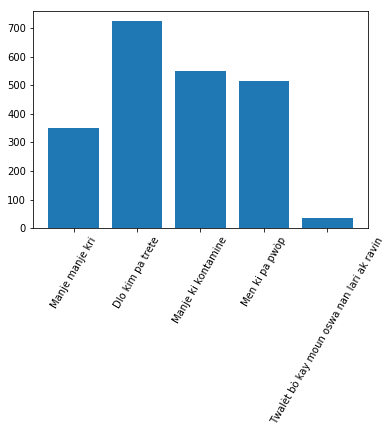

In [139]:
plot_g(r7)

In [85]:

"""
0. Veso ou paka wè sak ladanl byen
1. Veso ou ka wè byen fasil tout sak anndanl
2. Veso ki fèt an fè
3. Veso ki fèt ak ajil
"""
r7 = count_freq_multiple_answer(df, 'Nan Ki veso nou mete dlo pou nou bwè Fè moun nan baw wè veso a epi chwazi repons ki pi bon an', \
                                ['Veso ou paka wè sak ladanl byen',\
                                 'Veso ou ka wè byen fasil tout sak anndanl', \
                                 'Veso ki fèt an fè',\
                                 'Veso ki fèt ak ajil'])


778
                                    response  frequency
0  Veso ou ka wè byen fasil tout sak anndanl        392
1                          Veso ki fèt an fè         30
2            Veso ou paka wè sak ladanl byen         21
3                        Veso ki fèt ak ajil         23


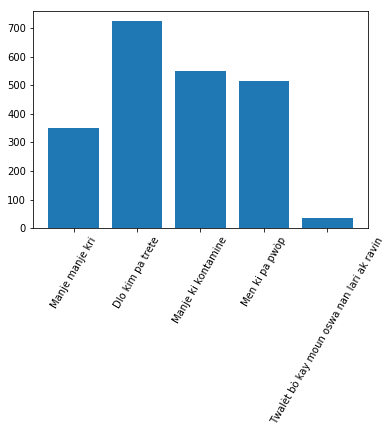

In [140]:
plot_g(r7)

In [86]:
r6 = count_freq_simple_answer(df, 'Nan veso nou mete dlo pou bwè a èske men nou konn touche ladan l')

  response  frequency
0      NaN        370
1   0. Non        313
2    1. Wi         95


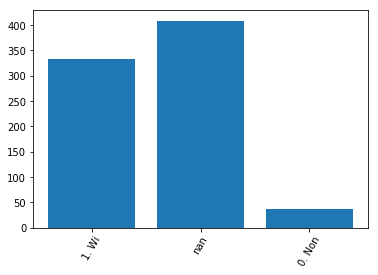

In [141]:
plot_g(r6)

In [87]:
#Èske l bon pou nou al chache dlo pou moun bwè nan veso san kouvri epi men n ap touche ladan l

In [88]:
r6 = count_freq_simple_answer(df, 'Èske l bon pou nou al chache dlo pou moun bwè nan veso san kouvri epi men n ap touche ladan l')

  response  frequency
0      NaN        372
1   0. Non        376
2    1. Wi         30


In [89]:
r6 = count_freq_simple_answer(df, 'Ki mwayen ou itilize pi souvan pou trete dlo lakay ou')

                                 response  frequency
0   1.Trete l ak klowòks ki fèt an likid.        248
1  0. Trete l ak klowòks ki fèt an grenn.        447
2  2. Trete l nan aparèy ki filtre dlo a.         47
3                          3. Bouyi dlo a         32
4                       5. Pa tretel menm          3
5                   4. Trete l nan solèy.          1


In [90]:
r6 = count_freq_simple_answer(df, 'Ki rezon ki konn fè w pa trete dlo ou konn bwè yo')

                                response  frequency
0                                    NaN        709
1                   0. Pwodwi yo twò chè         10
2                      3. Sa pa enpòtan.          4
3  2. Mwen pa jwenn pwodwi yo lakay mwen         54
4   1. Mwen pa konnen kòman pou m fè sa.          1


In [91]:
r6 = count_freq_simple_answer(df, 'Kisa ki ka rive si nou mete dlo pou bwè nan yon veso ki pa pwòp epi ki pa kouvri')

           response  frequency
0               NaN        374
1         1. Maladi        401
2  2. Yon bòn sante          3


In [92]:
r6 = count_freq_simple_answer(df, 'Aprè konbyen tan yon moun ka bwè yon dlo ki trete ak klowòks san danje')

                        response  frequency
0                            NaN        370
1  2. 30 minit aprè l fin trete.        349
2  1. 10 minit aprè l fin trete.         56
3              3. Mwen pa konnen          3


In [94]:
r6 = count_freq_simple_answer(df, 'Si w gen yon gwo swaf nan lari kisa w ap fè')

                       response  frequency
0  1. M'ap chèche dlo ki trete.        773
1                           NaN          1
2       2. M'ap bwè nenpòt dlo.          4


In [95]:
#Si'w gen yon twalèt ki prèske touye w nan lari,kisa w'ap fè
r6 = count_freq_simple_answer(df, 'Si w gen yon twalèt ki prèske touye w nan lari kisa w ap fè')

                                            response  frequency
0  1. M'ap chache yon latrin kay yon moun oubyen ...        774
1       2. M'ap fèl nan lari a oubyen nan yon ravin.          4


In [99]:
#Eske ou prè pou ou envesti kòb ou pou amelyore kalite dlo yap sèvi nan Kay la
r6 = count_freq_simple_answer(df, 'Eske ou prè pou ou envesti kòb ou pou amelyore kalite dlo yap sèvi nan Kay la')

  response  frequency
0      NaN        370
1    1. Wi        408


In [100]:
r6 = count_freq_simple_answer(df, 'Eske ou prè pou ou depanse plis pou ou jwenn bon jan dlo nan kominote wap viv')

  response  frequency
0      NaN        370
1    1. Wi        407
2   0. Non          1


In [101]:
r6 = count_freq_simple_answer(df, 'Eske ou prè pou ou prete kòb si w pa genyen pou ou jwenn bon jan dlo pouw sèvi')

  response  frequency
0      NaN        371
1    1. Wi        375
2   0. Non         32


## Enfòmasyon ki gen pou wè ak pwòpte epi ijyèn

In [102]:
r6 = count_freq_simple_answer(df, 'Èskew gen twalèt oubyen latrin lakay ou')

  response  frequency
0      NaN        370
1    1. Wi        406
2   0. Non          2


In [103]:
r6 = count_freq_simple_answer(df, 'Pou ki rezon w pa fè yon kote pou moun twalèt oubyen latrin lakay ou')

                                        response  frequency
0                                            NaN        712
1                       2. Pa gen kote pou m fèl          2
2                                         4. Lòt         10
3                    3. Gen yon latrin kominotè.         51
4  1. Li pa nan lis bagay ki bezwen fèt kounye a          3


In [104]:
r6 = count_freq_simple_answer(df, 'Ki kote w fè bezwen w si w pa gen latrin')

                     response  frequency
0                         NaN        623
1            0. Twalèt piblik        127
2  2. Ki ouvri tou pre kay la         24
3            3. Lòt (Presize)          4


In [107]:
r6 = count_freq_simple_answer(df, 'Pesizyon pou repons lòt ki nan kesyon 37 la.')

                                            response  frequency
0                                                NaN        775
1                                      Kay ton zanmi          1
2                                     Kay yon voisin          1
3  Map chache rantre lakay mwen oubyen ak jantiyè...          1


In [108]:
r6 = count_freq_simple_answer(df, 'Kisa yon twalèt ki fouye tou pre kote moun pran dlo ka lakoz')

            response  frequency
0      1. Bay maladi        769
1   2. Yon bòn sante          5
2  3. Mwen pa konnen          3
3           0. Anyen          1


In [109]:
r6 = count_freq_simple_answer(df, 'Kisa yon twalèt ki pwòp epi ki byen kouvri kapab lakoz')

            response  frequency
0   2. Yon bòn sante        541
1           0. Anyen        209
2  3. Mwen pa konnen         10
3      1. Bay maladi         18


In [110]:
r6 = count_freq_simple_answer(df, 'Kisa fè pipi ak poupou yon kote ki pa pwoteje kapab lakoz')

            response  frequency
0      1. Bay maladi        768
1  3. Mwen pa konnen          2
2       2. Yon sante          2
3           0. Anyen          6


In [111]:
r6 = count_freq_simple_answer(df, 'Si w grangou anpil ou jwenn yon manje kisa w ap fè')

                                        response  frequency
0     2. M'ap lave menm aprè m'ap manje manje a?        729
1  1. M'ap manje manje a aprè sa m'ap lave menm.         47
2                               3. Mw pa konnen.          2


In [112]:
r6 = count_freq_simple_answer(df, 'Eske ou prè pou ou envesti nan kontriksyon bon jan latrin oswa amelyore saw genyen yan')

  response  frequency
0      NaN        371
1    1. Wi        404
2   0. Non          3


In [113]:
r6 = count_freq_simple_answer(df, 'Eske ou prè pou depanse plis pou ou ka genyen bon jan latrin')

  response  frequency
0      NaN        371
1    1. Wi        405
2   0. Non          2


In [114]:
r6 = count_freq_simple_answer(df, 'Eske ou prè pou prete kòb pou ou ka genyen bon jan latrin')

  response  frequency
0      NaN        370
1    1. Wi        375
2   0. Non         33


## Pwòpte pou tèt paw

In [115]:
r6 = count_freq_simple_answer(df, 'Poukisa li enpòtan pou yon moun toujou pwòp')

                     response  frequency
0       0. Pou ka santiw byen        176
1            2. Sa pa enpòtan          1
2  1. Pouka gen yon bòn sante        600
3                         NaN          1


In [116]:
r6 = count_freq_simple_answer(df, 'Poukisa li enpòtan pou w lave men w')

                                         response  frequency
0  1. Pou anpeche maladi oswa pou evite enfeksyon        763
1                           0. Pou ka santiw byen         13
2                                2. Sa pa enpòtan          2


In [117]:
r6 = count_freq_simple_answer(df, 'Kisa yon moun bezwen pou l lave men l')

                       response  frequency
0               1. Dlo ak savon        764
1                  3. Dlo klore         10
2  2. Likid ki gen alkòl sèlman          2
3                 0. Dlo sèlman          2


In [118]:
"""
0. Aprèw sot nan twalèt
1. Avanw dòmi
2. Avanw manje
3. Aprèw fin netwaye timoun ki fè poupou sou li
4. Aprèw fin manje
5. Aprèw fin gade televizyon
6. Avan w manyen bagay ou pral fè manje
"""
r7 = count_freq_multiple_answer(df, 'Kilè li pi enpòtan pou yon moun lave men l', \
                                ['Aprèw sot nan twalèt',\
                                 'Avanw dòmi', \
                                 'Avanw manje',\
                                 'Aprèw fin netwaye timoun ki fè poupou sou li',\
                                'Aprèw fin manje',\
                                'Aprèw fin gade televizyon',\
                                'Avan w manyen bagay ou pral fè manje'])

778
                                       response  frequency
0                          Aprèw sot nan twalèt        769
1  Aprèw fin netwaye timoun ki fè poupou sou li        563
2          Avan w manyen bagay ou pral fè manje        217
3                                   Avanw manje        754
4                                    Avanw dòmi         13
5                     Aprèw fin gade televizyon          2
6                               Aprèw fin manje          7


In [119]:
r6 = count_freq_simple_answer(df, 'Eske yo montre nou kijan pou n lave men nou')

  response  frequency
0    1. Wi        367
1      NaN        410
2   0. Non          1


In [120]:
r6 = count_freq_simple_answer(df, 'Eske w satisfè nan fason yo fè pwomosyon ijyèn nan lekòl la')

        response  frequency
0     0. Satisfè        367
1            NaN        409
2  1. Pa satisfè          2


In [122]:
"""
1. Dlo kim pa trete.
2. Manje ki kontamine.
3. Men ki pa pwòp.
4. Manje manje kri.
5. Twalèt bò kay moun oswa nan lari ak ravin.
6. Mw pa konnen.
"""
r7 = count_freq_multiple_answer(df, 'Kisa ki ka bay yon moun dyare', \
                                ['Dlo kim pa trete',\
                                 'Manje ki kontamine', \
                                 'Men ki pa pwòp',\
                                 'Manje manje kri',\
                                'Twalèt bò kay moun oswa nan lari ak ravin',\
                                'Mw pa konnen'])

778
                                    response  frequency
0                            Manje manje kri        349
1                           Dlo kim pa trete        724
2                         Manje ki kontamine        551
3                             Men ki pa pwòp        515
4  Twalèt bò kay moun oswa nan lari ak ravin         36


## Ijyèn alimantè

In [123]:
r6 = count_freq_simple_answer(df, 'Poukisa li enpòtan pou n kouvri manje yo')

                       response  frequency
0  0. Pou pwoteje yo konn mouch        371
1        2. Pou yo ka san danje        105
2    1. Pou pwoteje yo konn bèt        301
3                           NaN          1


In [124]:
r6 = count_freq_simple_answer(df, 'Legim yo ak fwi yo dwe toujou lave avan yo manje yo.')

       response  frequency
0  0. Mwen dakò        778


## Jere Fatra

In [125]:
r6 = count_freq_simple_answer(df, 'ki kote nou dwe jete fatra')

                           response  frequency
0                               NaN        370
1                   1. Kamyon fatra        161
2  2. Nan zòn piblik pou mete fatra         67
3                     3. Nou boubèl        168
4       4. Nan rivyè oswa nan ravin          9
5                    0. Nenpòt kote          3


In [126]:
r6 = count_freq_simple_answer(df, 'Eske fatra ki mal jere ka bay maladi')

            response  frequency
0       0. Mwen dakò        775
1  2. Mwen pa konnen          3


In [127]:
r6 = count_freq_simple_answer(df, 'Kòman nou jere dlo ki pa bon yo')

                                            response  frequency
0                                1. Jete l tout kote          3
1  2. Jete l nan yon tiyo ki ale ak dlo oswa yon ...        644
2                     0. Itilize pou vide nan twalèt        131


In [128]:
r6 = count_freq_simple_answer(df, 'Eske nou vle ankouraje paran nou pou pran desizyon ki ka pèmèt nou aplike tout règ ijèn yo')

  response  frequency
0    1. Wi        360
1      NaN        409
2   0. Non          9


In [129]:
r6 = count_freq_simple_answer(df, 'Eske paran nou deja pran kèk desizyon sou kesyon ijèn')

  response  frequency
0    1. Wi        333
1      NaN        409
2   0. Non         36


In [23]:
r6 = count_freq_simple_answer(df, 'Eske paran nou deja pran kèk desizyon sou kesyon ijèn')

  response  frequency
0    1. Wi        333
1      NaN        409
2   0. Non         36


In [25]:
for c in list(df.columns):
    print(c)

Date
MOUN Y AP POZE KESYON YO.
Non chèf kay la.
Non pwofesè a.
Non direktè a
Zòn kote moun nan rete a.
Nan ki lekòl ou ye
DAT ENTEVYOU A AK LE LI KOUMANSE.
Non papa oubyen manman oubyen Gadyen an. 1
Non papa oubyen manman oubyen Gadyen an. 2
Sèks 1
Sèks 2
Kilè ou fèt 1
Kilè ou fèt 2
Relasyon ak moun kap dirije kay la 1
Relasyon ak moun kap dirije kay la 2
Nivo edikasyon 1
Nivo edikasyon 2
Sa moun lan ap fè poul ka pran swen tèt li 1
Sa moun lan ap fè poul ka pran swen tèt li 2
Eta Sivil moun nan. 1
Eta Sivil moun nan. 2
Nan 6 mwa ki pase yo èske gen moun nan kay la ki soufri maladi sa yo 1
Nan 6 mwa ki pase yo èske gen moun nan kay la ki soufri maladi sa yo 2
Ki kote dlo pou moun bwè san pwoblèm san danje san nou pa pè ka soti
Ki dlo ou toujou bwè
Ki dlo ou ankouraje paran yo ak elèv yo bwè
Ki dlo ou ankouraje pitit ou bwè
Ak ki dlo ou lave men w
Ki veso ki pi bon pou nou mete dlo pou moun bwè
Nan Ki veso nou mete dlo pou nou bwè Fè moun nan baw wè veso a epi chwazi repons ki pi bon an

In [33]:
num_respondents_by_school = df.groupby(['Nan ki lekòl ou ye', 'MOUN Y AP POZE KESYON YO.'])[['Nan ki lekòl ou ye']].count()

Nan ki lekòl ou ye
Nan ki lekòl ou ye                     MOUN Y AP POZE KESYON YO.                    
1. Ecole Mixte Bethesda                0. Paran                                   47
                                       1. Elèv                                    46
                                       2. Pwofesè                                  3
                                       4. Direktè                                  1
2. Ecole Louis Maccen                  0. Paran                                   38
                                       1. Elèv                                    37
                                       4. Direktè                                  1
3. Frans Béda Académie                 0. Paran                                   15
                                       1. Elèv                                    11
4. Institution Mixte Bethleem          0. Paran                                   43
                                       1. Elèv                                    41
                                       2. Pwofesè                                  8
5. Institution Mixte Espoir            0. Paran                                   24
                                       1. Elèv                                    30
                                       2. Pwofesè                                  2
                                       4. Direktè                                  1
6. Institution Mixte Alma Mater        0. Paran                                   76
                                       1. Elèv                                    83
                                       2. Pwofesè                                  8
                                       4. Direktè                                  1
7. Collègue Mixte Toussaint Louverture 0. Paran                                   83
                                       1. Elèv                                    87
                                       2. Pwofesè                                 11
                                       4. Direktè                                  1
8. Liberty Collège Mixte               0. Paran                                   41
                                       1. Elèv                                    34
                                       2. Pwofesè                                  3
                                       4. Direktè                                  1

In [34]:
num_respondents_by_school = df.groupby(['Nan ki lekòl ou ye', 'MOUN Y AP POZE KESYON YO.'])[['Nan ki lekòl ou ye']].count()

In [41]:
num_respondents_by_school.columns = ['frequency']

In [223]:
r1 = num_respondents_by_school.reset_index(level=['Nan ki lekòl ou ye', 'MOUN Y AP POZE KESYON YO.'])

In [224]:
r1.columns = ['school', 'respondent category', 'frequency']
#


# experiment

In [219]:
r1

,school,respondent category,frequency
0,1. Ecole Mixte Bethesda,0. Paran,47
1,1. Ecole Mixte Bethesda,1. Elèv,46
2,1. Ecole Mixte Bethesda,2. Pwofesè,3
3,1. Ecole Mixte Bethesda,4. Direktè,1
4,2. Ecole Louis Maccen,0. Paran,38
5,2. Ecole Louis Maccen,1. Elèv,37
6,2. Ecole Louis Maccen,4. Direktè,1
7,3. Frans Béda Académie,0. Paran,15
8,3. Frans Béda Académie,1. Elèv,11
9,4. Institution Mixte Bethleem,0. Paran,43


In [225]:

def rename_value(df, col_name, values):
    col = df[col_name]
    col_renamed = []
    for v in col:
        col_renamed.append(values.get(v))
    return col_renamed
        
        
    
    

In [226]:
respondents = {'0. Paran': 'parent', '1. Elèv': 'student', '2. Pwofesè': 'teacher', '4. Direktè': 'principal'}
l1 = rename_value(r1, 'respondent category', respondents)
l1 = rename_value(r1, 'respondent category', respondents)
r1['respondent category'] = l1
#r1 = r1.set_index(['school', 'Respondent category'])
#r1.plot(x='school', y=['school', 'respondent category'], kind='bar') #r1.columns = ['school', 'Respondent category', 'frequency']

In [227]:
schools = {'1. Ecole Mixte Bethesda': 'Ecole Mixte Bethesda',\
               '2. Ecole Louis Maccen': 'Ecole Louis Maccen',\
               '3. Frans Béda Académie': 'Frans Béda Académie',\
               '4. Institution Mixte Bethleem': 'Institution Mixte Bethleem',
               '5. Institution Mixte Espoir': 'Institution Mixte Espoir',
               '6. Institution Mixte Alma Mater': 'Institution Mixte Alma Mater',
               '7. Collègue Mixte Toussaint Louverture': 'Collègue Mixte Toussaint Louverture',
               '8. Liberty Collège Mixte': 'Liberty Collège Mixte'
               
          }
l = rename_value(r1, 'school', schools)

In [228]:
r1['school'] = l


In [229]:
r1 = r1.set_index(['school', 'respondent category'])

In [230]:
r1.isna().any()

frequency    False
dtype: bool

In [172]:
sum(list(r1.frequency))

777

In [231]:
r1

frequency
school                              respondent category           
Ecole Mixte Bethesda                parent                      47
                                    student                     46
                                    teacher                      3
                                    principal                    1
Ecole Louis Maccen                  parent                      38
                                    student                     37
                                    principal                    1
Frans Béda Académie                 parent                      15
                                    student                     11
Institution Mixte Bethleem          parent                      43
                                    student                     41
                                    teacher                      8
Institution Mixte Espoir            parent                      24
                                    student                     30
                                    teacher                      2
                                    principal                    1
Institution Mixte Alma Mater        parent                      76
                                    student                     83
                                    teacher                      8
                                    principal                    1
Collègue Mixte Toussaint Louverture parent                      83
                                    student                     87
                                    teacher                     11
                                    principal                    1
Liberty Collège Mixte               parent                      41
                                    student                     34
                                    teacher                      3
                                    principal                    1

Text(0,0.5,'School')

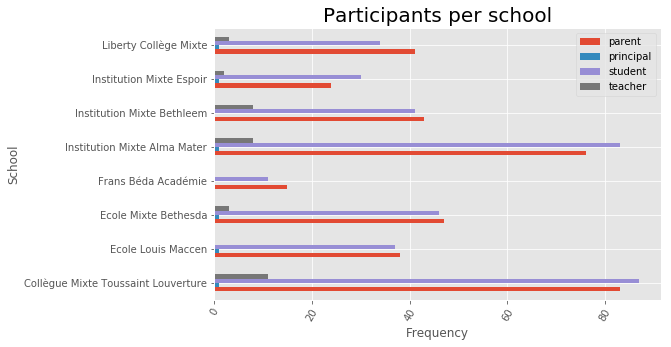

In [249]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(8, 5))
#plt.legend(['parent', 'pupil', 'teacher', 'principal'])
plt.xticks(rotation=60)
#fig.patch.set_facecolor('green')
r1.unstack().plot(kind='barh', ax=ax)
#ax.set_axis_bgcolor("lightslategray")
L=plt.legend()
L.get_texts()[0].set_text('parent')
L.get_texts()[1].set_text('principal')
L.get_texts()[2].set_text('student')
L.get_texts()[3].set_text('teacher')
plt.title('Participants per school',fontsize=20)
plt.xlabel('Frequency')
plt.ylabel('School')
 
# Create labels
#plt.savefig('participant.png')


frequency
school                              respondent category           
Ecole Mixte Bethesda                parent                      47
                                    student                     46
                                    teacher                      3
                                    principal                    1
Ecole Louis Maccen                  parent                      38
                                    student                     37
                                    principal                    1
Frans Béda Académie                 parent                      15
                                    student                     11
Institution Mixte Bethleem          parent                      43
                                    student                     41
                                    teacher                      8
Institution Mixte Espoir            parent                      24
                                    student                     30
                                    teacher                      2
                                    principal                    1
Institution Mixte Alma Mater        parent                      76
                                    student                     83
                                    teacher                      8
                                    principal                    1
Collègue Mixte Toussaint Louverture parent                      83
                                    student                     87
                                    teacher                     11
                                    principal                    1
Liberty Collège Mixte               parent                      41
                                    student                     34
                                    teacher                      3
                                    principal                    1